# Data Mining - Project Part 1
דן דברת - 208570325
נריה יעקב - 207602897

# Churn Dataset - Full Data Analysis and Preprocessing

In [1]:
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import seaborn as sns  # Importing seaborn for advanced data visualization

# Settings
pd.set_option('display.max_columns', None)  # Ensures all columns are shown when displaying DataFrames
sns.set(style="whitegrid")  # Sets the seaborn style to "whitegrid" for better readability in plots

# Load data
df = pd.read_csv("churn_dataset_train.csv")  # Loads the training dataset from a CSV file into a DataFrame



## Part 1: Initial Data Overview

### 1.1 General Overview of the Data

In [2]:
print("\n--- Dataset Info ---")  # Print section header for dataset info
df.info()  # Display concise summary of the DataFrame including data types and non-null counts

# Create a summary DataFrame with metadata for each column
data_summary = pd.DataFrame({
    'Data Type': df.dtypes,  # Data type of each column
    'Missing Values': df.isnull().sum(),  # Number of missing values in each column
    'Missing %': df.isnull().mean() * 100,  # Percentage of missing values in each column
    'Unique Values': df.nunique()  # Number of unique values in each column
})

# Select numeric columns (int and float types)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Generate descriptive statistics for numeric columns and transpose for readability
numeric_desc = df[numeric_cols].describe().T

# Display the summary and descriptive statistics
display(data_summary)  # Display the data summary DataFrame
display(numeric_desc)  # Display the transposed descriptive statistics of numeric columns



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24784 entries, 0 to 24783
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            24784 non-null  int64  
 1   customer_id                   24784 non-null  object 
 2   Name                          24784 non-null  object 
 3   age                           24784 non-null  int64  
 4   gender                        24784 non-null  object 
 5   security_no                   24784 non-null  object 
 6   region_category               21087 non-null  object 
 7   membership_category           24784 non-null  object 
 8   joining_date                  24784 non-null  object 
 9   joined_through_referral       21158 non-null  object 
 10  referral_id                   12787 non-null  object 
 11  preferred_offer_types         24576 non-null  object 
 12  medium_of_operation           21156 no

,Data Type,Missing Values,Missing %,Unique Values
ID,int64,0,0.000000,24784
customer_id,object,0,0.000000,24784
Name,object,0,0.000000,24784
age,int64,0,0.000000,55
gender,object,0,0.000000,3
security_no,object,0,0.000000,24784
region_category,object,3697,14.916882,3
membership_category,object,0,0.000000,6
joining_date,object,0,0.000000,1096
joined_through_referral,object,3626,14.630407,2


,count,mean,std,min,25%,50%,75%,max
ID,24784.0,18467.497014,10660.308320,0.000000,9262.7500,18495.500,27676.250,36989.000000
age,24784.0,36.986967,15.860701,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,24784.0,-42.462314,229.834676,-999.000000,8.0000,12.000,16.000,26.000000
avg_time_spent,24784.0,241.974449,395.333687,-2281.236526,60.1650,161.390,354.725,3040.410000
avg_transaction_value,24784.0,29307.237880,19436.878248,800.460000,14194.1925,27612.555,40862.025,99914.050000
points_in_wallet,22497.0,686.287574,193.175055,-549.357498,616.4100,696.920,763.090,1816.933696
churn,24784.0,0.265655,0.441690,0.000000,0.0000,0.000,1.000,1.000000


#### 1.1.1 Missing Values

In [3]:
# Calculate the number of missing values per row
missing_per_row = df.isnull().sum(axis=1)

# Count how many rows have each specific number of missing values and sort by the count
missing_summary = missing_per_row.value_counts().sort_index()

# Loop through the summary and print the number of rows with each amount of missing values
for missing_count, num_rows in missing_summary.items():
    print(f"יש {num_rows} שורות עם {missing_count} חוסרים")  # Hebrew: "There are {num_rows} rows with {missing_count} missing values"


יש 6246 שורות עם 0 חוסרים
יש 12550 שורות עם 1 חוסרים
יש 5124 שורות עם 2 חוסרים
יש 811 שורות עם 3 חוסרים
יש 53 שורות עם 4 חוסרים


#### 1.1.2 Removing rows with 4 or more missing values 🧹

In [4]:
before_rows = df.shape[0]  # Store the number of rows before removing rows with too many missing values

# Keep only rows with fewer than 4 missing values
df = df[missing_per_row < 4]

after_rows = df.shape[0]  # Store the number of rows after removal

# Print the number of rows before and after filtering, and how many were removed
print(f"Number of rows before removal: {before_rows}")
print(f"Number of rows after removal: {after_rows}")
print(f"Number of rows removed: {before_rows - after_rows}")


Number of rows before removal: 24784
Number of rows after removal: 24731
Number of rows removed: 53


#### 1.1.3 Removing Unnecessary Columns 🧹

In [5]:
# Drop unnecessary or identifier columns from the DataFrame
df = df.drop(['security_no', 'referral_id', 'customer_id'], axis=1)


# Part 2: Visualization and Cleaning Per Column

## 2.1 `age`

#### 2.1.1 Feature Visualization and Exploration 📊

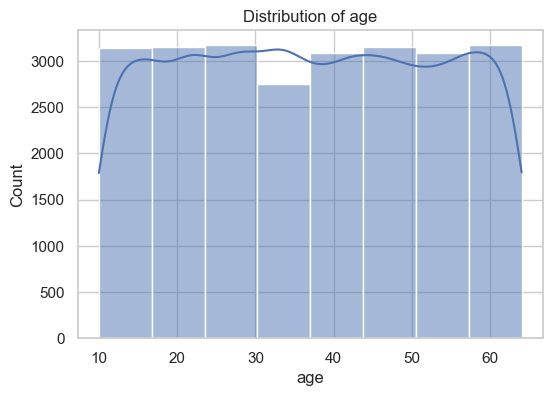

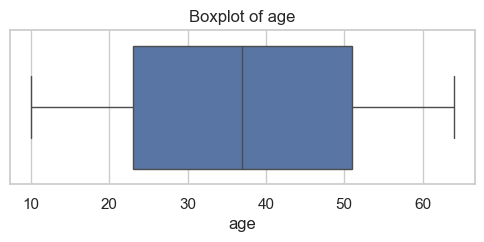

In [6]:
# Create a histogram with KDE (Kernel Density Estimate) to show the distribution of the 'age' column
plt.figure(figsize=(6, 4))  # Set the figure size
sns.histplot(df['age'], kde=True, bins=8)  # Plot histogram with 8 bins and density curve
plt.title('Distribution of age')  # Set plot title
plt.xlabel('age')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show()  # Display the plot

# Create a boxplot to visualize the distribution and outliers in the 'age' column
plt.figure(figsize=(6, 2))  # Set the figure size
sns.boxplot(x=df['age'])  # Plot boxplot of the 'age' column
plt.title('Boxplot of age')  # Set plot title
plt.show()  # Display the plot


## 2.2 `gender`

#### 2.2.1 Feature Visualization and Exploration 📊

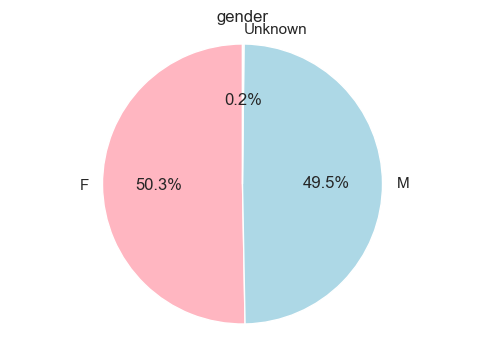

In [7]:
# Count the number of occurrences for each gender category
gender_counts = df['gender'].value_counts()

# Create a pie chart to visualize gender distribution
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    gender_counts,  # Values for the pie slices
    labels=gender_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Display percentages with one decimal
    startangle=90,  # Start the pie chart from the top (90 degrees)
    colors=['lightpink', 'lightblue']  # Custom colors for each gender
)
plt.title('gender')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()  # Display the chart


#### 2.2.2 Cleaning and Preprocessing 🧹

In [8]:
# Map the 'gender' column to a binary format: 1 for 'M' (male), 0 for 'F' (female), and fill missing values with 'Unknown'
df['Is_Male'] = df['gender'].map({'M': 1, 'F': 0}).fillna('Unknown')

# Drop the original 'gender' column from the DataFrame
df.drop(['gender'], axis=1,inplace=True)


## 2.3 `region_category`

#### 2.3.1 Feature Visualization and Exploration 📊

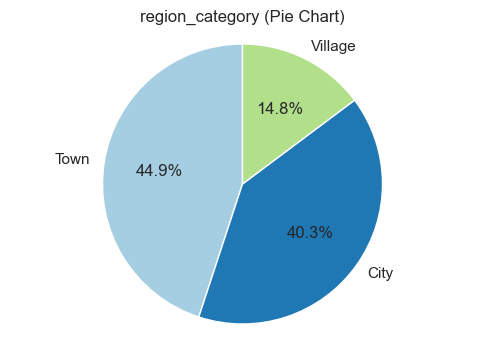

In [9]:
# Count the number of occurrences for each region category
region_counts = df['region_category'].value_counts()

# Create a pie chart to visualize the distribution of region categories
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    region_counts,  # Values for the pie slices
    labels=region_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90,  # Start the pie chart from the top
    colors=plt.cm.Paired.colors  # Use a colormap for varied colors
)
plt.title('region_category (Pie Chart)')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


#### 2.3.2 Cleaning and Preprocessing 🧹

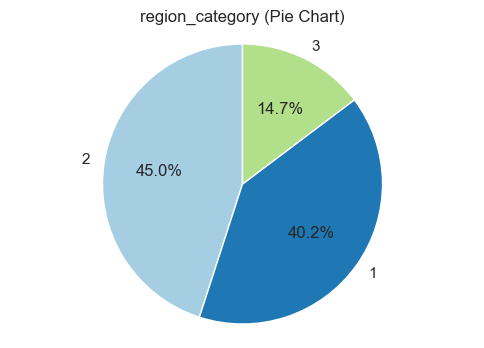

In [10]:
# Calculate the probabilities (normalized frequencies) of each value in 'region_category'
probabilities = df['region_category'].value_counts(normalize=True)

# For rows with missing values in 'region_category', fill them based on the calculated probabilities
df['region_category'] = df['region_category'].apply(
    lambda x: np.random.choice(probabilities.index, p=probabilities.values) if pd.isnull(x) else x
)

# Map the categorical values in 'region_category' to numerical values
df['region_category'] = df['region_category'].map({'City': 1, 'Town': 2, 'Village': 3})

# Count the number of occurrences for each region category
region_counts = df['region_category'].value_counts()

# Create a pie chart to visualize the distribution of region categories
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    region_counts,  # Values for the pie slices
    labels=region_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90,  # Start the pie chart from the top
    colors=plt.cm.Paired.colors  # Use a colormap for varied colors
)
plt.title('region_category (Pie Chart)')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


## 2.4 `membership_category`

#### 2.4.1 Feature Visualization and Exploration 📊

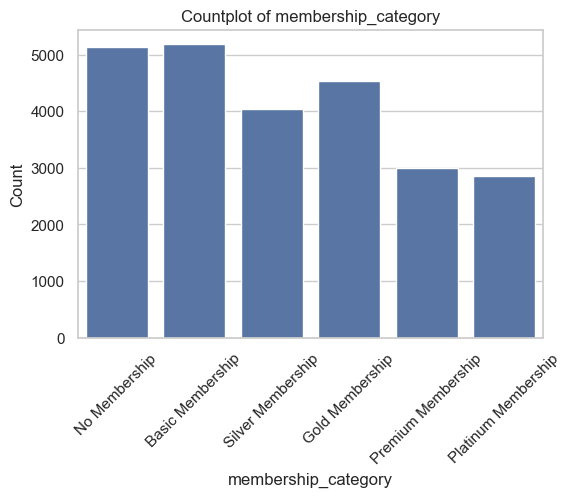

In [11]:
# Get the original order of unique values in the 'membership_category' column
original_order = df['membership_category'].value_counts().index.tolist()

# Swap the first and second values in the original order list
original_order[0], original_order[1] = original_order[1], original_order[0]

# Swap the third and fourth values in the original order list
original_order[2], original_order[3] = original_order[3], original_order[2]

# Create a countplot to visualize the distribution of 'membership_category'
plt.figure(figsize=(6, 4))  # Set the figure size
sns.countplot(x=df['membership_category'], order=original_order)  # Plot countplot with custom order
plt.title('Countplot of membership_category')  # Set plot title
plt.xlabel('membership_category')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


#### 2.4.2 Cleaning and Preprocessing 🧹

In [12]:
# Create a dictionary to map membership categories to numerical values
membership_mapping = {
    'No Membership': 0,
    'Basic Membership': 1,
    'Silver Membership': 2,
    'Gold Membership': 3,
    'Platinum Membership': 4,
    'Premium Membership': 5
}

# Apply the mapping to the 'membership_category' column to replace categorical values with numerical ones
df['membership_category'] = df['membership_category'].map(membership_mapping)



## 2.5 `joining_date`

#### 2.5.1 Feature Visualization and Exploration 📊

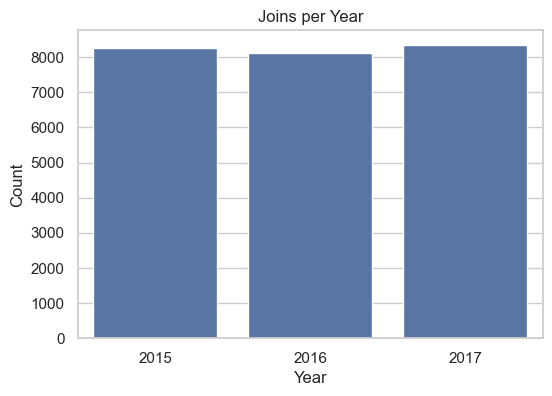

In [13]:
# Convert the 'joining_date' column to datetime format, assuming the format is 'day/month/year'
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%d/%m/%Y')

# Extract the year from the 'joining_date' and store it in a new column 'join_year'
df['join_year'] = df['joining_date'].dt.year

# Create a countplot to visualize the number of joins per year
plt.figure(figsize=(6, 4))  # Set the figure size
sns.countplot(x='join_year', data=df, order=sorted(df['join_year'].dropna().unique()))  # Plot countplot with sorted years
plt.title('Joins per Year')  # Set the plot title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show()  # Display the plot

# Drop the 'join_year' column as it is no longer needed
df.drop(['join_year'], axis=1, inplace=True)


####  2.5.2 Cleaning and Preprocessing 🧹

In [14]:
# Convert the 'joining_date' column to datetime format, coercing errors (invalid dates will become NaT)
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')

# Convert the 'joining_date' back to string format in the 'day/month/year' format
df['joining_date'] = df['joining_date'].dt.strftime('%d/%m/%Y')


## 2.6 `joined_through_referral`

#### 2.6.1 Feature Visualization and Exploration 📊

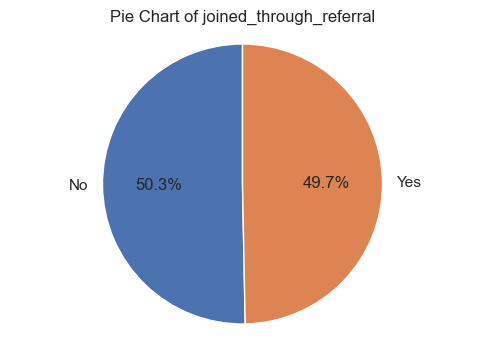

In [15]:
# Count the number of occurrences for each value in the 'joined_through_referral' column
referral_counts = df['joined_through_referral'].value_counts()

# Create a pie chart to visualize the distribution of 'joined_through_referral'
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    referral_counts,  # Values for the pie slices
    labels=referral_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90  # Start the pie chart from the top
)
plt.title('Pie Chart of joined_through_referral')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


####  2.6.2 Cleaning and Preprocessing 🧹

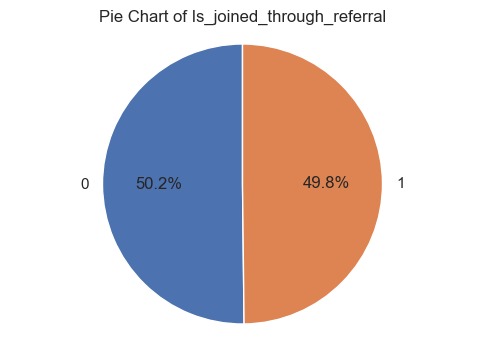

In [16]:
# Calculate the probabilities (normalized frequencies) of each value in 'joined_through_referral'
probabilities = df['joined_through_referral'].value_counts(normalize=True)

# For rows with missing values in 'joined_through_referral', fill them based on the calculated probabilities
df['joined_through_referral'] = df['joined_through_referral'].apply(
    lambda x: np.random.choice(probabilities.index, p=probabilities.values) if pd.isnull(x) else x
)

# Map 'Yes' to 1 and 'No' to 0 in the 'joined_through_referral' column
df['joined_through_referral'] = df['joined_through_referral'].map({'Yes': 1, 'No': 0})

# Rename the column to 'Is_joined_through_referral'
df = df.rename(columns={'joined_through_referral': 'Is_joined_through_referral'})

# Display the first few values of the 'Is_joined_through_referral' column to verify changes
df['Is_joined_through_referral'].head()

# Count the number of occurrences for each value in 'Is_joined_through_referral'
referral_counts = df['Is_joined_through_referral'].value_counts()

# Create a pie chart to visualize the distribution of 'Is_joined_through_referral'
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    referral_counts,  # Values for the pie slices
    labels=referral_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90  # Start the pie chart from the top
)
plt.title('Pie Chart of Is_joined_through_referral')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


## 2.7 `preferred_offer_types`

#### 2.7.1 Feature Visualization and Exploration 📊

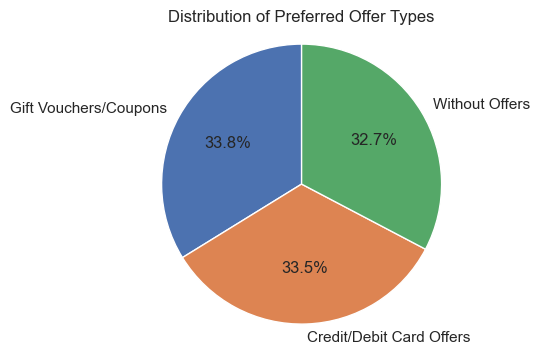

In [17]:
# Count the number of occurrences for each value in 'preferred_offer_types'
offer_counts = df['preferred_offer_types'].value_counts()

# Create a pie chart to visualize the distribution of preferred offer types
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    offer_counts,  # Values for the pie slices
    labels=offer_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90  # Start the pie chart from the top
)
plt.title('Distribution of Preferred Offer Types')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


####  2.7.2 Cleaning and Preprocessing 🧹

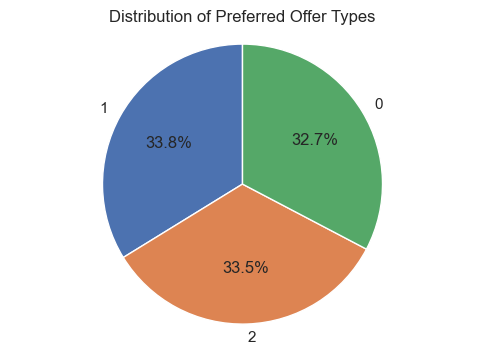

In [18]:
# Calculate the probabilities (normalized frequencies) of each value in 'preferred_offer_types'
probabilities = df['preferred_offer_types'].value_counts(normalize=True)

# For rows with missing values in 'preferred_offer_types', fill them based on the calculated probabilities
df['preferred_offer_types'] = df['preferred_offer_types'].apply(
    lambda x: np.random.choice(probabilities.index, p=probabilities.values) if pd.isnull(x) else x
)

# Map 'preferred_offer_types' categorical values to numerical values
df['preferred_offer_types'] = df['preferred_offer_types'].map({
    'Credit/Debit Card Offers': 2,  # Assign 2 for 'Credit/Debit Card Offers'
    'Gift Vouchers/Coupons': 1,     # Assign 1 for 'Gift Vouchers/Coupons'
    'Without Offers': 0             # Assign 0 for 'Without Offers'
})

# Display the first few values of the 'preferred_offer_types' column to verify changes
df['preferred_offer_types'].head()

# Count the number of occurrences for each value in 'preferred_offer_types'
offer_counts = df['preferred_offer_types'].value_counts()

# Create a pie chart to visualize the distribution of preferred offer types
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    offer_counts,  # Values for the pie slices
    labels=offer_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90  # Start the pie chart from the top
)
plt.title('Distribution of Preferred Offer Types')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


## 2.8 `medium_of_operation`

#### 2.8.1 Feature Visualization and Exploration 📊

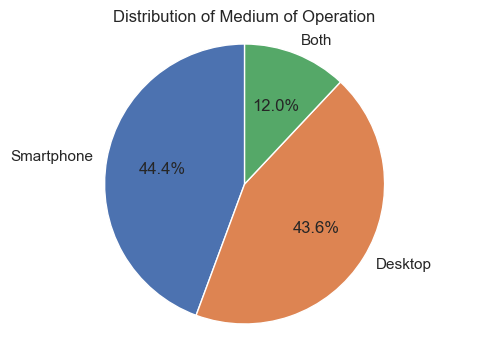

In [19]:
# Count the number of occurrences for each value in 'medium_of_operation'
medium_counts = df['medium_of_operation'].value_counts()

# Create a pie chart to visualize the distribution of medium of operation
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    medium_counts,  # Values for the pie slices
    labels=medium_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90  # Start the pie chart from the top
)
plt.title('Distribution of Medium of Operation')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


####  2.8.2 Cleaning and Preprocessing 🧹

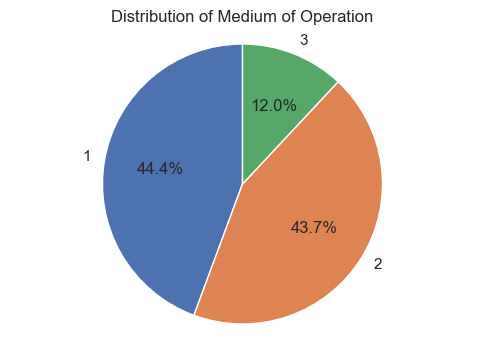

In [20]:
# Calculate the probabilities (normalized frequencies) of each value in 'medium_of_operation'
probabilities = df['medium_of_operation'].value_counts(normalize=True)

# For rows with missing values in 'medium_of_operation', fill them based on the calculated probabilities
df['medium_of_operation'] = df['medium_of_operation'].apply(
    lambda x: np.random.choice(probabilities.index, p=probabilities.values) if pd.isnull(x) else x
)

# Map 'medium_of_operation' categorical values to numerical values
df['medium_of_operation'] = df['medium_of_operation'].map({
    'Smartphone': 1,  # Assign 1 for 'Smartphone'
    'Desktop': 2,     # Assign 2 for 'Desktop'
    'Both': 3         # Assign 3 for 'Both'
})

# Display the first few values of the 'medium_of_operation' column to verify changes
df['medium_of_operation'].head()

# Count the number of occurrences for each value in 'medium_of_operation'
medium_counts = df['medium_of_operation'].value_counts()

# Create a pie chart to visualize the distribution of medium of operation
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    medium_counts,  # Values for the pie slices
    labels=medium_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90  # Start the pie chart from the top
)
plt.title('Distribution of Medium of Operation')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


## 2.9 `internet_option`

#### 2.9.1 Feature Visualization and Exploration 📊

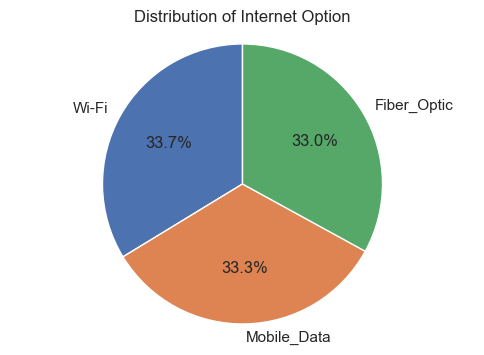

In [21]:
# Count the number of occurrences for each value in 'internet_option'
internet_counts = df['internet_option'].value_counts()

# Create a pie chart to visualize the distribution of internet option
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    internet_counts,  # Values for the pie slices
    labels=internet_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage with one decimal place
    startangle=90  # Start the pie chart from the top
)
plt.title('Distribution of Internet Option')  # Set chart title
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  # Display the chart


## 2.10 `days_since_last_login`

#### 2.10.1 Feature Visualization and Exploration 📊

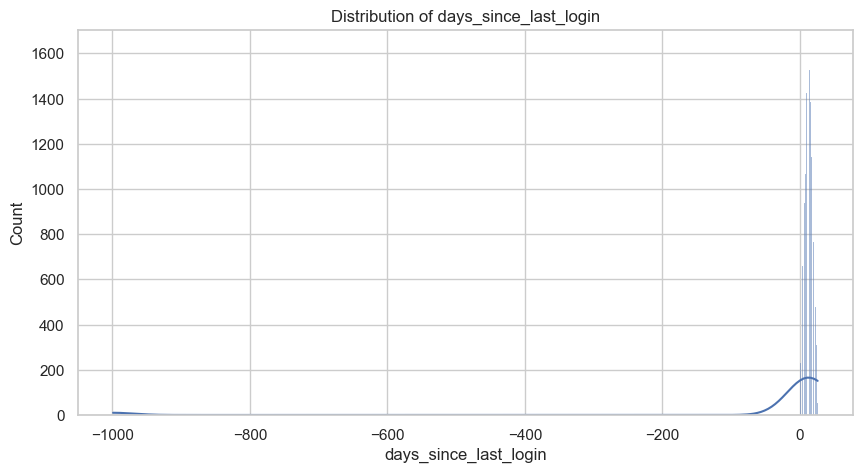

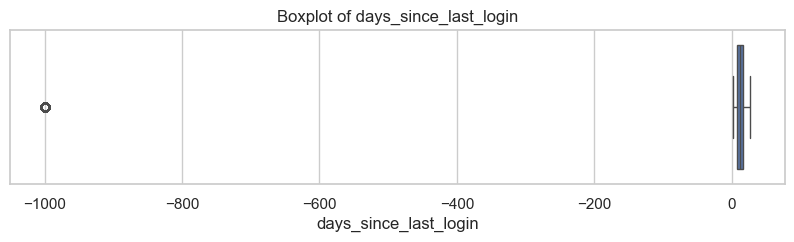

In [22]:
# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'days_since_last_login'
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['days_since_last_login'], kde=True)  # Plot histogram with KDE
plt.title('Distribution of days_since_last_login')  # Set chart title
plt.xlabel('days_since_last_login')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers of 'days_since_last_login'
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df['days_since_last_login'])  # Plot boxplot
plt.title('Boxplot of days_since_last_login')  # Set chart title
plt.show()  # Display the chart


#### 2.10.2 Checking for outlier Value (-999) 

In [23]:
# Count the number of occurrences where 'days_since_last_login' equals -999
count_neg_999 = (df['days_since_last_login'] == -999).sum()

# Calculate the percentage of occurrences of -999 in the 'days_since_last_login' column
percent_neg_999 = count_neg_999 / df.shape[0] * 100

# Print the number of occurrences and the percentage of -999 in the data
print(f"Occurrences of -999: {count_neg_999} times ({percent_neg_999:.2f}% of the data)")


Occurrences of -999: 1351 times (5.46% of the data)


#### 2.10.3  Example Visualization After Removing -999 📊

Original data size: 24731
Cleaned data size: 23380 (removed 1351 rows)


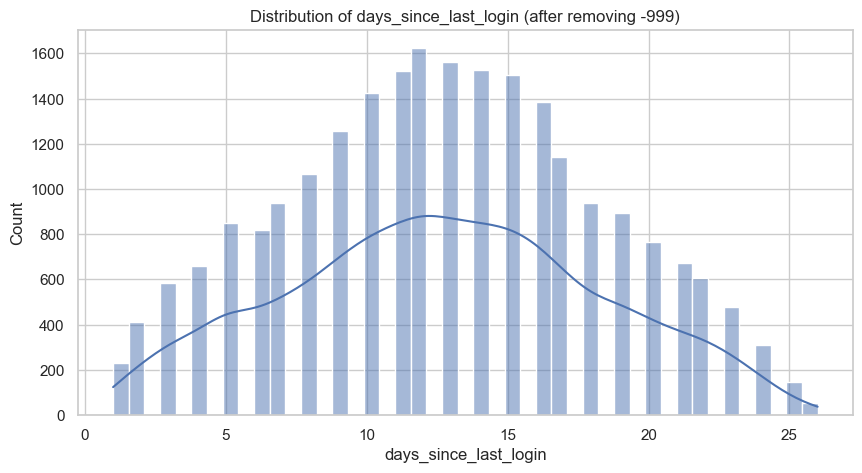

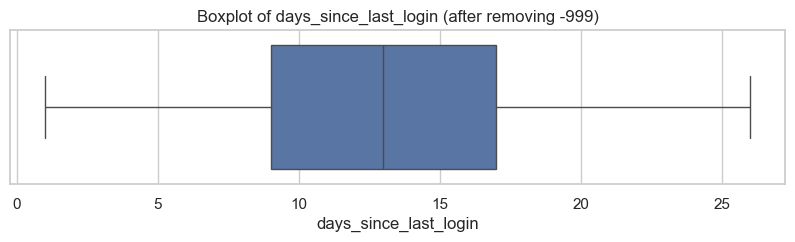

In [24]:
# Convert 'days_since_last_login' to numeric values, setting invalid parsing as NaN (coerce)
df['days_since_last_login'] = pd.to_numeric(df['days_since_last_login'], errors='coerce')

# Remove rows where 'days_since_last_login' equals -999 (considered as invalid data)
df_clean = df[df['days_since_last_login'] != -999]

# Print the size of the original and cleaned datasets, showing the number of rows removed
print(f"Original data size: {df.shape[0]}")  # Original size before cleaning
print(f"Cleaned data size: {df_clean.shape[0]} (removed {df.shape[0] - df_clean.shape[0]} rows)")  # Size after cleaning

# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'days_since_last_login' after cleaning
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df_clean['days_since_last_login'], kde=True)  # Plot histogram with KDE
plt.title('Distribution of days_since_last_login (after removing -999)')  # Set chart title
plt.xlabel('days_since_last_login')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers of 'days_since_last_login' after cleaning
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df_clean['days_since_last_login'])  # Plot boxplot
plt.title('Boxplot of days_since_last_login (after removing -999)')  # Set chart title
plt.show()  # Display the chart


####  2.10.4 Cleaning and Preprocessing 🧹

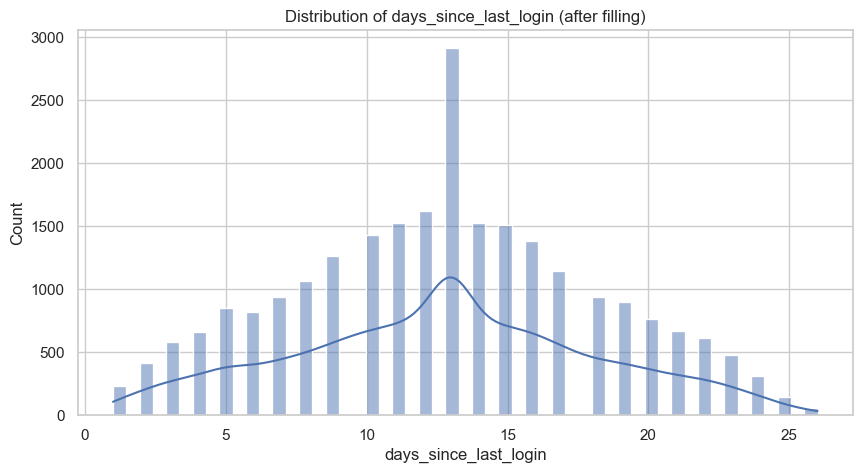

In [25]:
# Calculate the median value of 'days_since_last_login' excluding -999 values
median_val = df.loc[df['days_since_last_login'] != -999, 'days_since_last_login'].median()

# Replace the outlier values (-999) with the calculated median
df['days_since_last_login'] = df['days_since_last_login'].replace(-999, median_val)

# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'days_since_last_login' after replacing -999 with the median
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['days_since_last_login'], kde=True)  # Plot histogram with KDE
plt.title('Distribution of days_since_last_login (after filling)')  # Set chart title
plt.xlabel('days_since_last_login')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart


## 2.11 `avg_time_spent`

#### 2.11.1 Feature Visualization and Exploration 📊

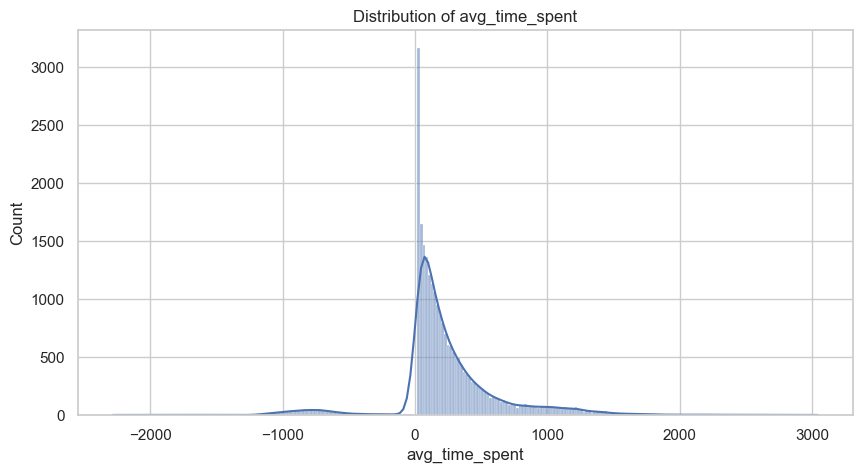

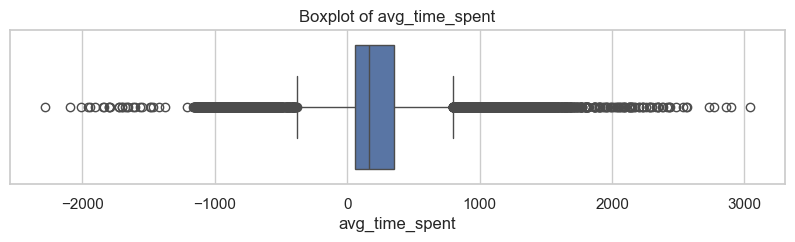

In [26]:
# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'avg_time_spent'
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['avg_time_spent'], kde=True)  # Plot histogram with KDE
plt.title('Distribution of avg_time_spent')  # Set chart title
plt.xlabel('avg_time_spent')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers of 'avg_time_spent'
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df['avg_time_spent'])  # Plot boxplot
plt.title('Boxplot of avg_time_spent')  # Set chart title
plt.show()  # Display the chart


#### 2.11.2 Detecting and Fixing Negative Values

In [27]:
# Count the number of negative values in 'avg_time_spent'
count_negative = (df['avg_time_spent'] < 0).sum()

# Calculate the percentage of negative values in 'avg_time_spent'
percent_negative = count_negative / df.shape[0] * 100

# Print the count and percentage of negative values in 'avg_time_spent'
print(f"Negative values: {count_negative} times ({percent_negative:.2f}% of the data)")

# Create a new column 'avg_time_spent_abs' that stores the absolute values of 'avg_time_spent'
df['avg_time_spent_abs'] = df['avg_time_spent'].abs()

# Calculate and display descriptive statistics for 'avg_time_spent_abs'
stats = df['avg_time_spent_abs'].describe()

# Print statistics after applying the absolute value transformation
print("\nStatistics of avg_time_spent after applying absolute value:")
print(stats)


Negative values: 1147 times (4.64% of the data)

Statistics of avg_time_spent after applying absolute value:
count    24731.000000
mean       313.418617
std        341.555747
min         12.338460
25%         75.545000
50%        185.780000
75%        414.265000
max       3040.410000
Name: avg_time_spent_abs, dtype: float64


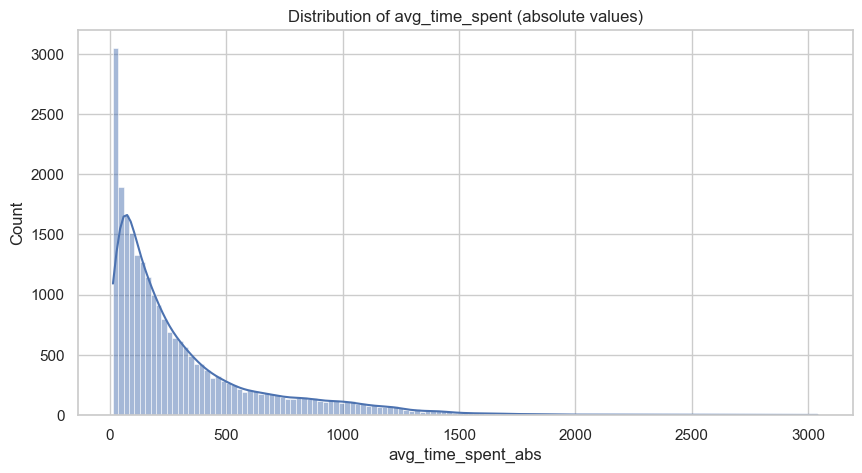

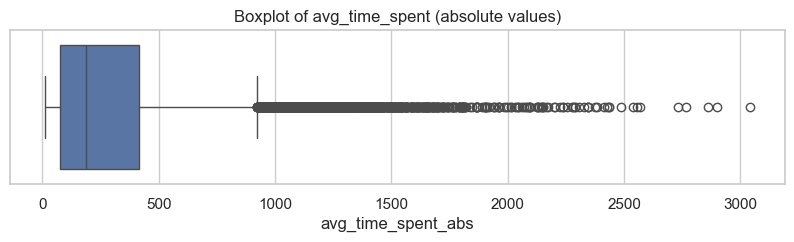

In [28]:
# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'avg_time_spent_abs' (absolute values)
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['avg_time_spent_abs'], kde=True)  # Plot histogram with KDE
plt.title('Distribution of avg_time_spent (absolute values)')  # Set chart title
plt.xlabel('avg_time_spent_abs')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers of 'avg_time_spent_abs' (absolute values)
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df['avg_time_spent_abs'])  # Plot boxplot
plt.title('Boxplot of avg_time_spent (absolute values)')  # Set chart title
plt.show()  # Display the chart


####  2.11.3 Cleaning and Preprocessing 🧹

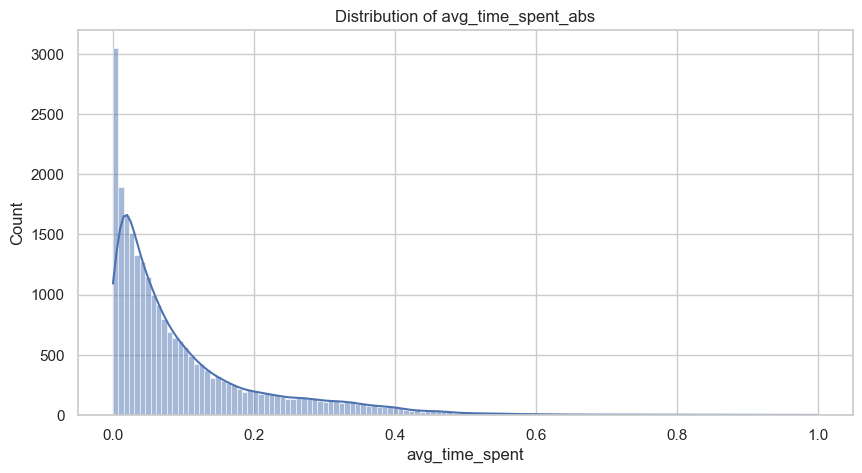

In [29]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to normalize 'avg_time_spent_abs' and create a new column 'avg_time_spent_normalized'
df['avg_time_spent_normalized'] = scaler.fit_transform(df[['avg_time_spent_abs']])

# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'avg_time_spent_normalized'
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['avg_time_spent_normalized'], kde=True)  # Plot histogram with KDE
plt.title('Distribution of avg_time_spent_abs')  # Set chart title
plt.xlabel('avg_time_spent')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Drop the original 'avg_time_spent' and 'avg_time_spent_abs' columns as they are no longer needed
df.drop(['avg_time_spent', 'avg_time_spent_abs'], axis=1, inplace=True)


## 2.12 `avg_transaction_value`

#### 2.12.1 Feature Visualization and Exploration 📊

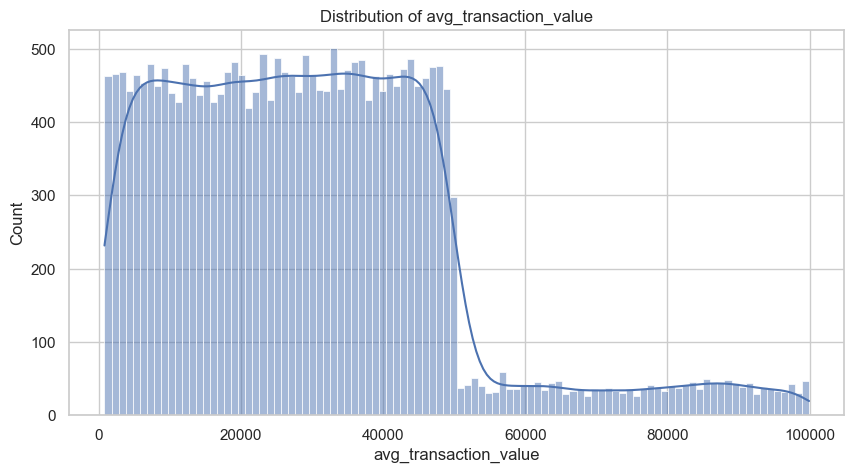

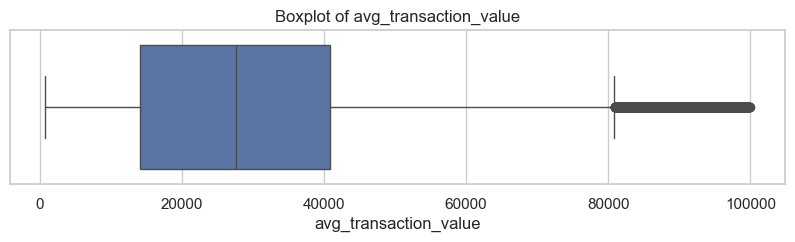

In [30]:
# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'avg_transaction_value'
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['avg_transaction_value'], kde=True, bins=100)  # Plot histogram with KDE and 100 bins
plt.title('Distribution of avg_transaction_value')  # Set chart title
plt.xlabel('avg_transaction_value')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers of 'avg_transaction_value'
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df['avg_transaction_value'])  # Plot boxplot
plt.title('Boxplot of avg_transaction_value')  # Set chart title
plt.show()  # Display the chart


####  2.12.2 Cleaning and Preprocessing 🧹

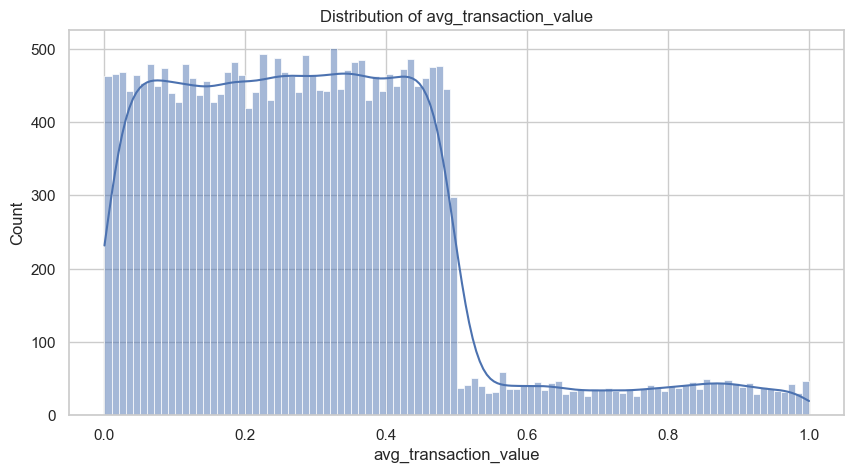

In [31]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to normalize 'avg_transaction_value' and create a new column 'avg_transaction_value_normalized'
df['avg_transaction_value_normalized'] = scaler.fit_transform(df[['avg_transaction_value']])

# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'avg_transaction_value_normalized'
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['avg_transaction_value_normalized'], kde=True, bins=100)  # Plot histogram with KDE and 100 bins
plt.title('Distribution of avg_transaction_value')  # Set chart title
plt.xlabel('avg_transaction_value')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Drop the original 'avg_transaction_value' column as it is no longer needed
df.drop(['avg_transaction_value'], axis=1, inplace=True)


### 2.13  `avg_frequency_login_days`

#### 2.13.1 Feature Visualization and Exploration 📊

number of Errors:  2348
Original Data:
count    22383.000000
mean        15.986683
std          9.246005
min        -43.652702
25%          9.000000
50%         16.000000
75%         23.000000
max         67.062422
Name: avg_frequency_login_days, dtype: float64


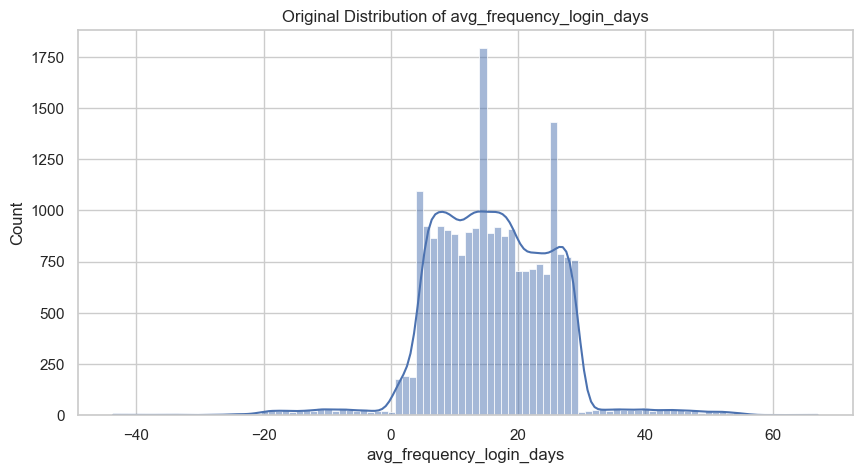

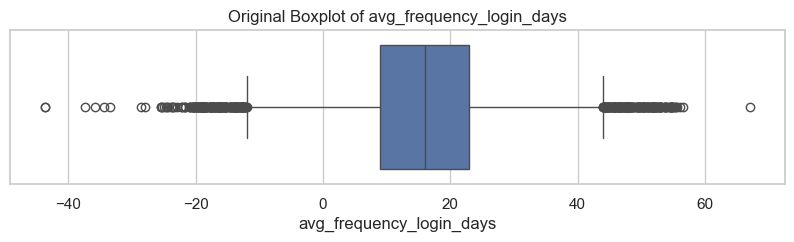

In [32]:
# Count the number of occurrences of 'Error' in the 'avg_frequency_login_days' column
error_counts = (df['avg_frequency_login_days'] == 'Error').sum()
print("number of Errors: ", error_counts)  # Print the count of errors

# Convert 'avg_frequency_login_days' column to numeric, replacing non-numeric values with NaN
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

# -------------------------
# Original Data Visualization
# -------------------------

print("Original Data:")  # Print message indicating the start of original data display
print(df['avg_frequency_login_days'].describe())  # Print statistical summary of the 'avg_frequency_login_days' column

# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of 'avg_frequency_login_days'
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['avg_frequency_login_days'], kde=True, bins=100)  # Plot histogram with KDE and 100 bins
plt.title('Original Distribution of avg_frequency_login_days')  # Set chart title
plt.xlabel('avg_frequency_login_days')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers of 'avg_frequency_login_days'
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df['avg_frequency_login_days'])  # Plot boxplot
plt.title('Original Boxplot of avg_frequency_login_days')  # Set chart title
plt.show()  # Display the chart


#### 2.13.2 After Removing Negative Values

After Removing Negative Values:
Removed 2796 rows (11.31% of the data)
count    21935.000000
mean        16.544202
std          8.408443
min          0.009208
25%         10.000000
50%         16.000000
75%         23.000000
max         67.062422
Name: avg_frequency_login_days, dtype: float64


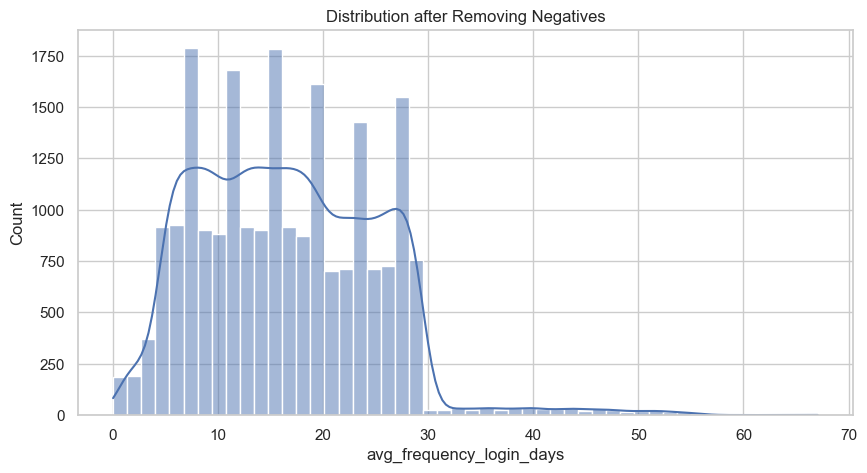

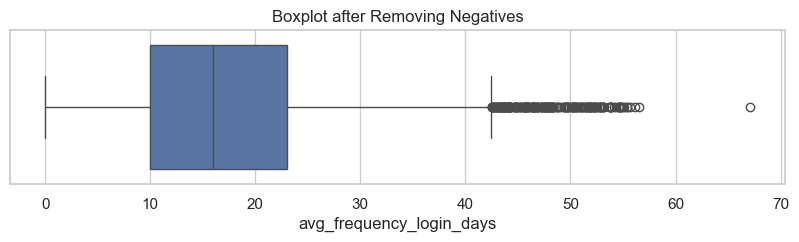

In [33]:
# -------------------------
# After Removing Negative Values
# -------------------------

print("After Removing Negative Values:")  # Print message indicating the start of data after removing negative values

# Filter out rows where 'avg_frequency_login_days' is negative
df_filtered = df[(df['avg_frequency_login_days'] >= 0)]  # Keep only non-negative values

# Calculate the number of rows removed and the percentage of removed rows
removed_rows = df.shape[0] - df_filtered.shape[0]
percent_removed = removed_rows / df.shape[0] * 100

print(f"Removed {removed_rows} rows ({percent_removed:.2f}% of the data)")  # Print number and percentage of removed rows
print(df_filtered['avg_frequency_login_days'].describe())  # Print statistical summary of the filtered column

# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution after removing negatives
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df_filtered['avg_frequency_login_days'], kde=True, bins=50)  # Plot histogram with KDE and 50 bins
plt.title('Distribution after Removing Negatives')  # Set chart title
plt.xlabel('avg_frequency_login_days')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers after removing negatives
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df_filtered['avg_frequency_login_days'])  # Plot boxplot
plt.title('Boxplot after Removing Negatives')  # Set chart title
plt.show()  # Display the chart


#### 2.13.3  After Applying Absolute Value

 After Applying Absolute Value :
count    22383.000000
mean        16.439451
std          8.414655
min          0.006221
25%         10.000000
50%         16.000000
75%         23.000000
max         67.062422
Name: avg_frequency_login_days_abs, dtype: float64


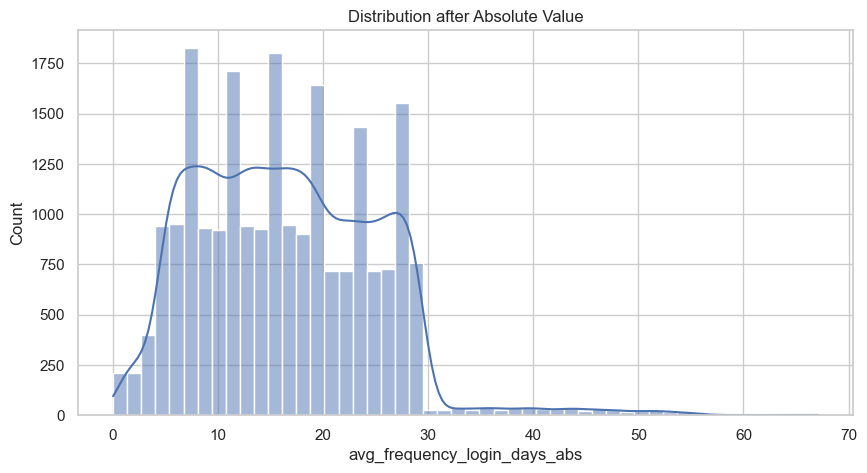

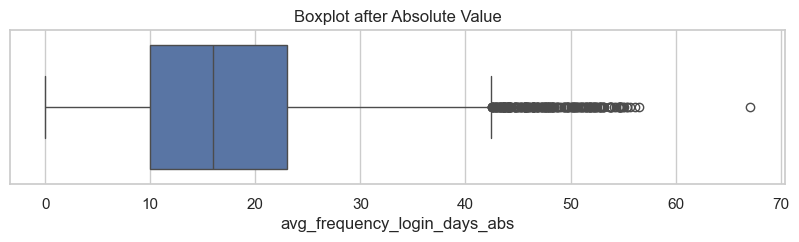

In [34]:
# -------------------------
# After Applying Absolute Value
# -------------------------
print(" After Applying Absolute Value :")  # Print message indicating the start of data after applying absolute value

# Apply absolute value to 'avg_frequency_login_days' to remove negative signs
df['avg_frequency_login_days_abs'] = df['avg_frequency_login_days'].abs()  # Convert negative values to positive

print(df['avg_frequency_login_days_abs'].describe())  # Print statistical summary of the column after applying absolute value

# Create a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution after applying absolute value
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df['avg_frequency_login_days_abs'], kde=True, bins=50)  # Plot histogram with KDE and 50 bins
plt.title('Distribution after Absolute Value')  # Set chart title
plt.xlabel('avg_frequency_login_days_abs')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the chart

# Create a boxplot to visualize the distribution and potential outliers after applying absolute value
plt.figure(figsize=(10, 2))  # Set the figure size
sns.boxplot(x=df['avg_frequency_login_days_abs'])  # Plot boxplot
plt.title('Boxplot after Absolute Value')  # Set chart title
plt.show()  # Display the chart


####  2.13.4 Cleaning and Preprocessing 🧹

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_5972/2346743870.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_frequency_login_days'].replace('Error', np.nan, inplace=True)  # Replace 'Error' with NaN


Percentage <= 30: 97.73%
Percentage > 30: 2.27%
Null values before imputation: 2348


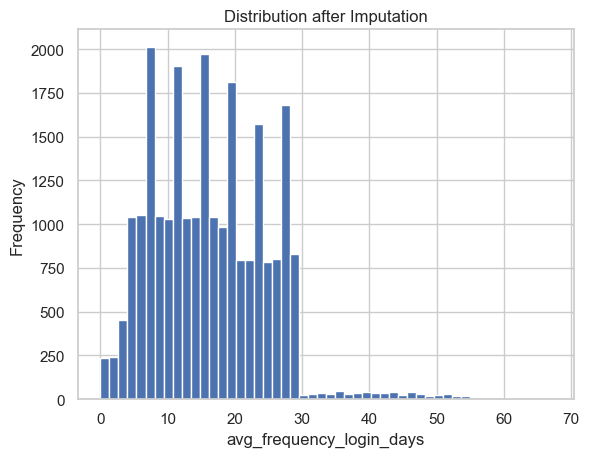

Null values after imputation: 0


In [35]:
# Replace 'Error' values with NaN (if present), and apply absolute values to 'avg_frequency_login_days'
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].abs()
df['avg_frequency_login_days'].replace('Error', np.nan, inplace=True)  # Replace 'Error' with NaN

# Drop any remaining NaN values to analyze the data
data = df['avg_frequency_login_days'].dropna()

# Define a split point for the distribution (30 in this case)
split_point = 30

# Count proportions of data below and above the split point
below_split = data[data <= split_point]
above_split = data[data > split_point]

# Calculate percentages for both parts of the data
below_pct = len(below_split) / len(data)
above_pct = len(above_split) / len(data)

print(f"Percentage <= {split_point}: {below_pct * 100:.2f}%")
print(f"Percentage > {split_point}: {above_pct * 100:.2f}%")

# Count the number of null values in 'avg_frequency_login_days'
null_count = df['avg_frequency_login_days'].isna().sum()
print(f"Null values before imputation: {null_count}")

# Calculate the number of nulls to fill from each part based on proportions
below_nulls = int(null_count * below_pct)
above_nulls = null_count - below_nulls  # Remaining nulls for the 'above_split' section

# Randomly sample values from the 'below_split' and 'above_split' data to fill nulls
fill_below = below_split.sample(below_nulls, replace=True, random_state=42).values
fill_above = above_split.sample(above_nulls, replace=True, random_state=42).values

# Combine the filled values and shuffle them to create a random sequence
filled_values = np.concatenate([fill_below, fill_above])
np.random.shuffle(filled_values)  # Shuffle to ensure randomness

# Impute the NaN values in the original dataframe with the filled values
df.loc[df['avg_frequency_login_days'].isna(), 'avg_frequency_login_days'] = filled_values

# Visualize the distribution of 'avg_frequency_login_days' after imputation
df['avg_frequency_login_days'].hist(bins=50)
plt.title('Distribution after Imputation')
plt.xlabel('avg_frequency_login_days')
plt.ylabel('Frequency')
plt.show()

# Count nulls again after imputation to verify that all NaNs were filled
null_count = df['avg_frequency_login_days'].isna().sum()
print(f"Null values after imputation: {null_count}")

# Drop 'avg_frequency_login_days_abs' as it's no longer needed
df.drop(['avg_frequency_login_days_abs'], axis=1, inplace=True)


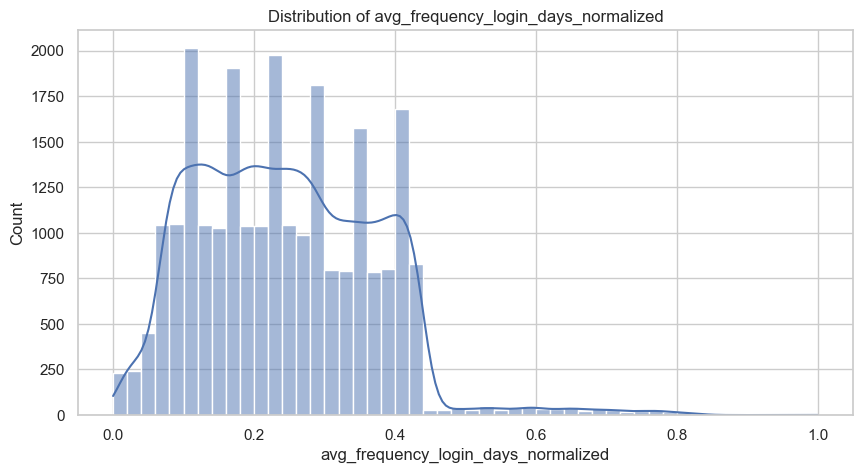

In [36]:

# Initialize the scaler
scaler = MinMaxScaler()

# Use MinMaxScaler to normalize the 'avg_frequency_login_days' column
df['avg_frequency_login_days_normalized'] = scaler.fit_transform(df[['avg_frequency_login_days']])

# Create a histogram with KDE for the normalized values of 'avg_frequency_login_days'
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_frequency_login_days_normalized'], kde=True, bins=50)
plt.title('Distribution of avg_frequency_login_days_normalized')  # Title for the plot
plt.xlabel('avg_frequency_login_days_normalized')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()

# Drop the original 'avg_frequency_login_days' column after normalization
df.drop(['avg_frequency_login_days'], axis=1, inplace=True)


## 2.14 `points_in_wallet`

#### 2.14.1 Feature Visualization and Exploration 📊

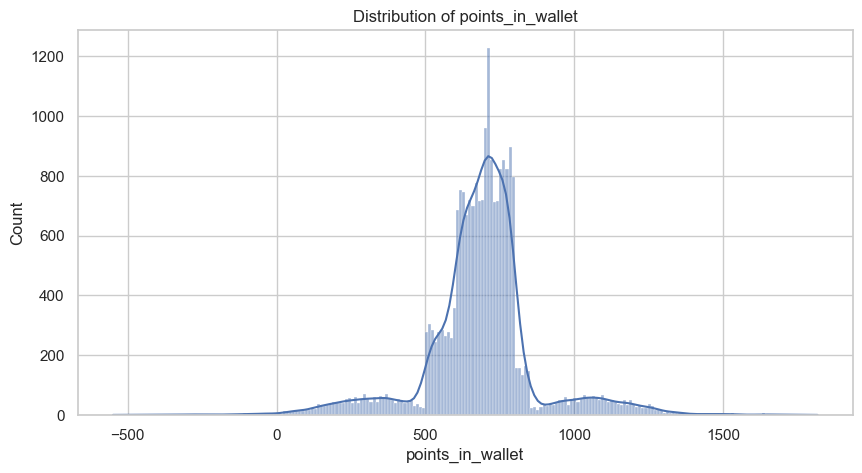

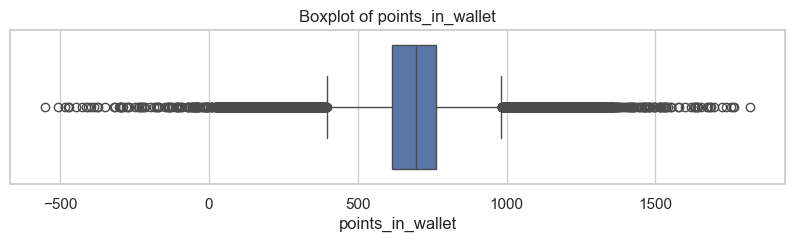

In [37]:
# Create a histogram with KDE for the 'points_in_wallet' column
plt.figure(figsize=(10, 5))
sns.histplot(df['points_in_wallet'], kde=True)  # Add KDE (Kernel Density Estimate) to the histogram
plt.title('Distribution of points_in_wallet')  # Set the title of the histogram
plt.xlabel('points_in_wallet')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the histogram

# Create a boxplot for the 'points_in_wallet' column
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['points_in_wallet'])  # Boxplot to visualize the spread of data
plt.title('Boxplot of points_in_wallet')  # Set the title for the boxplot
plt.show()  # Display the boxplot


####  2.14.2 Cleaning and Preprocessing 🧹

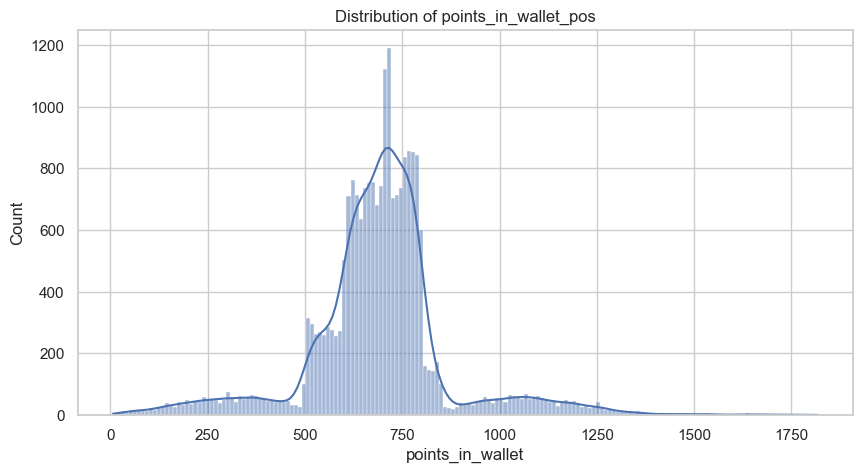

In [38]:
# Convert the 'points_in_wallet' column to numeric, setting invalid values as NaN
df['points_in_wallet'] = pd.to_numeric(df['points_in_wallet'], errors='coerce')

# Create a new column 'points_in_wallet_pos' that contains only non-negative values from 'points_in_wallet'
df['points_in_wallet_pos'] = df.loc[df['points_in_wallet'] >= 0, 'points_in_wallet']

# Create a histogram with KDE for the 'points_in_wallet_pos' column (non-negative values)
plt.figure(figsize=(10, 5))
sns.histplot(df['points_in_wallet_pos'], kde=True)  # Add KDE to visualize the distribution
plt.title('Distribution of points_in_wallet_pos')  # Set the title for the histogram
plt.xlabel('points_in_wallet')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the histogram


#### 2.14.3 Visualizing Negative Values

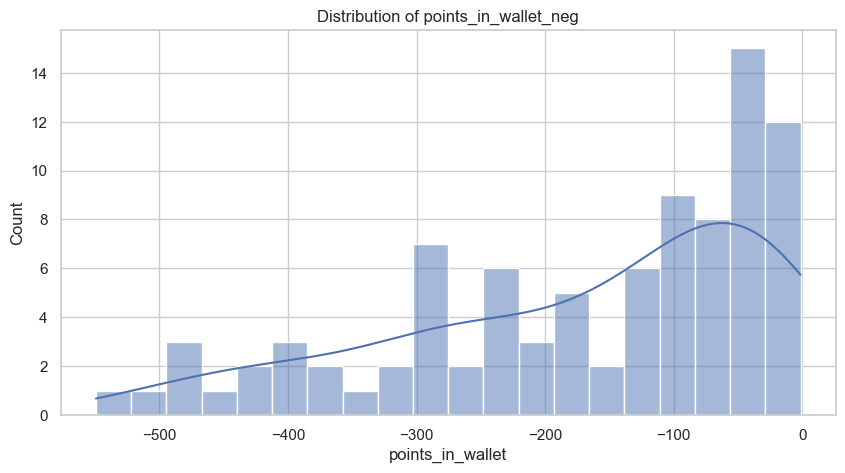

In [39]:
# Create a new column 'points_in_wallet_neg' that contains only negative values from 'points_in_wallet'
df['points_in_wallet_neg'] = df.loc[df['points_in_wallet'] < 0, 'points_in_wallet']

# Create a histogram with KDE for the 'points_in_wallet_neg' column (negative values)
plt.figure(figsize=(10, 5))
sns.histplot(df['points_in_wallet_neg'], bins=20, kde=True)  # Add KDE to visualize the distribution
plt.title('Distribution of points_in_wallet_neg')  # Set the title for the histogram
plt.xlabel('points_in_wallet')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the histogram


#### 2.14.4 Filling Missing  with Random Values from Normal Distribution

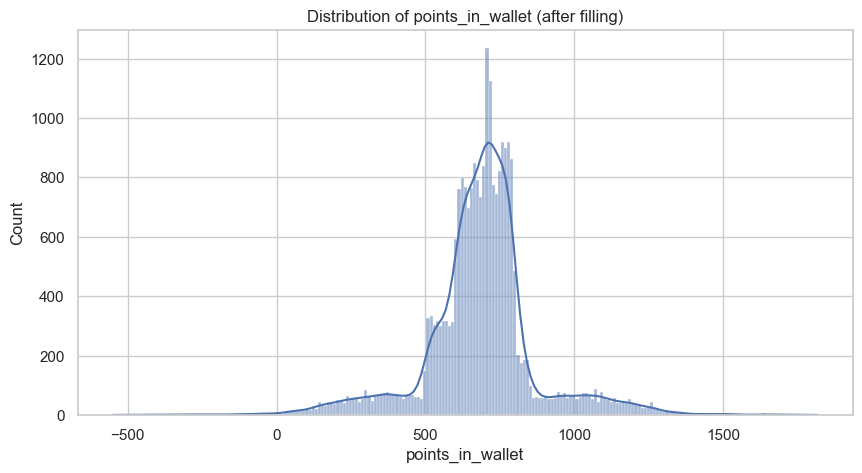

In [40]:
# Calculate the mean and standard deviation of 'points_in_wallet'
mean_val = df['points_in_wallet'].mean()  # Mean of 'points_in_wallet'
std_val = df['points_in_wallet'].std()  # Standard deviation of 'points_in_wallet'

# Count the number of missing (NaN) values in 'points_in_wallet'
num_to_fill = df['points_in_wallet'].isnull().sum()  # Total number of missing values

# Generate random values from a normal distribution with the calculated mean and std deviation
random_values = np.random.normal(loc=mean_val, scale=std_val, size=num_to_fill)  # Normal distribution

# Fill the missing values in 'points_in_wallet' with the generated random values
df.loc[df['points_in_wallet'].isnull(), 'points_in_wallet'] = random_values

# Plot the distribution of 'points_in_wallet' after filling the missing values
plt.figure(figsize=(10, 5))
sns.histplot(df['points_in_wallet'], kde=True)  # Create histogram with KDE for 'points_in_wallet'
plt.title('Distribution of points_in_wallet (after filling)')  # Title for the plot
plt.xlabel('points_in_wallet')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.show()  # Display the plot


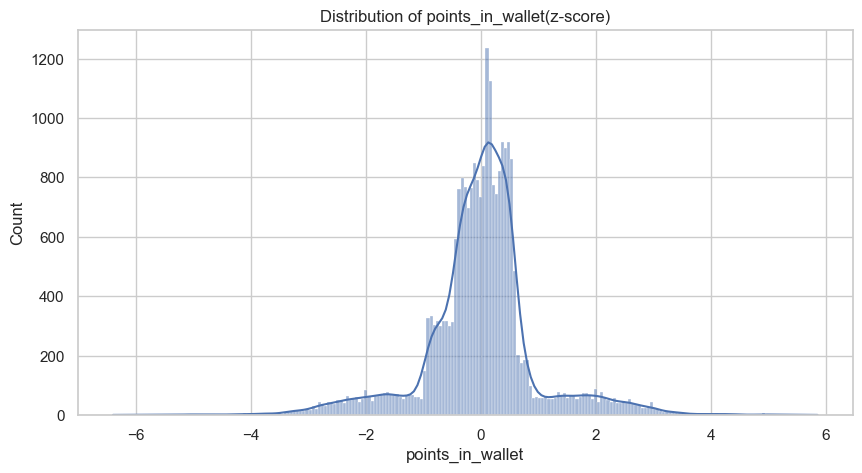

In [41]:
# Calculate the z-score for 'points_in_wallet' by subtracting the mean and dividing by the standard deviation
df['points_in_wallet_zscore'] = (df['points_in_wallet'] - mean_val) / std_val  # Standardize values by z-score

# Drop the original 'points_in_wallet' column as we no longer need it
df.drop(['points_in_wallet'], axis=1, inplace=True)  # Drop the 'points_in_wallet' column

# Plot the distribution of the z-score for 'points_in_wallet'
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df['points_in_wallet_zscore'], kde=True)  # Create histogram with KDE for z-scores
plt.title('Distribution of points_in_wallet(z-score)')  # Title for the plot
plt.xlabel('points_in_wallet')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.show()  # Display the plot

# Drop the positive and negative point distribution columns as they are no longer needed
df.drop(['points_in_wallet_pos', 'points_in_wallet_neg'], axis=1, inplace=True)  # Remove extra columns


## 2.15 `used_special_discount`

#### 2.15.1 Feature Visualization and Exploration 📊

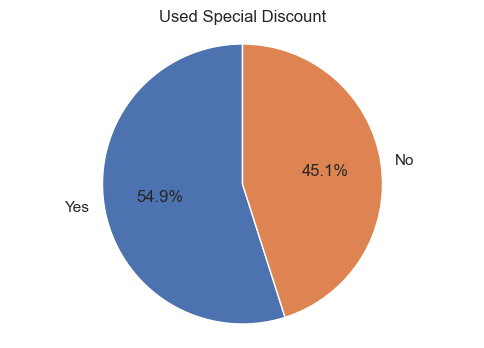

In [42]:
# Count the occurrences of each unique value in the 'used_special_discount' column
internet_counts = df['used_special_discount'].value_counts()  # Calculate the count of each value

# Create a pie chart to visualize the distribution of the 'used_special_discount' column
plt.figure(figsize=(6,4))  # Set figure size
plt.pie(internet_counts, labels=internet_counts.index, autopct='%1.1f%%', startangle=90)  # Create pie chart
plt.title('Used Special Discount')  # Title for the pie chart
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()  # Display the pie chart


####  2.15.2 Cleaning and Preprocessing 🧹

In [43]:
# Map 'Yes' to 1 and 'No' to 0 in the 'used_special_discount' column
df['used_special_discount'] = df['used_special_discount'].map({'Yes': 1, 'No': 0})


## 2.16 `offer_application_preference`

#### 2.16.1 Feature Visualization and Exploration 📊

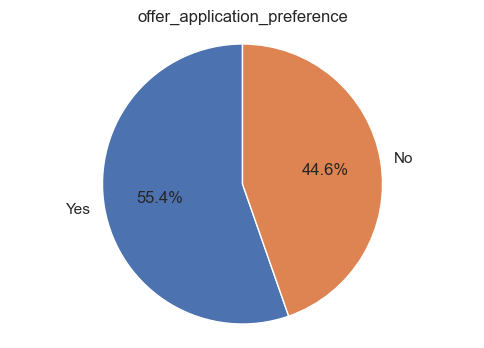

In [44]:
# Count the occurrences in the 'offer_application_preference' column
internet_counts = df['offer_application_preference'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 4))
plt.pie(internet_counts, labels=internet_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('offer_application_preference')
plt.axis('equal')  # Keeps the chart circular
plt.show()


####  2.16.2 Cleaning and Preprocessing 🧹

In [45]:
# Map 'Yes' to 1 and 'No' to 0 in the 'offer_application_preference' column
df['offer_application_preference'] = df['offer_application_preference'].map({'Yes': 1, 'No': 0})

# Rename the column to 'prefers_offer_application'
df = df.rename(columns={'offer_application_preference': 'prefers_offer_application'})


## 2.17 `past_complaint`

#### 2.17.1 Feature Visualization and Exploration 📊

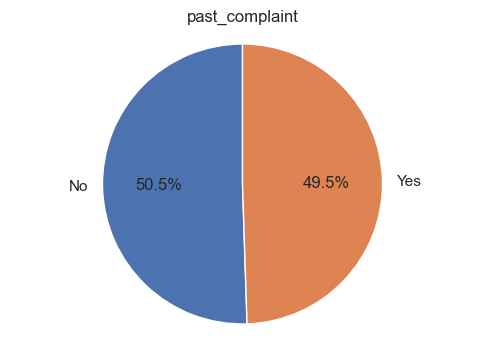

In [46]:
# Count the values in the 'past_complaint' column
internet_counts = df['past_complaint'].value_counts()

# Plot a pie chart of the 'past_complaint' distribution
plt.figure(figsize=(6, 4))
plt.pie(internet_counts, labels=internet_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('past_complaint')
plt.axis('equal')  # Keeps the pie chart circular
plt.show()


####  2.17.2 Cleaning and Preprocessing 🧹

In [47]:
# Map 'Yes' and 'No' values in the 'past_complaint' column to 1 and 0, respectively
df['past_complaint'] = df['past_complaint'].map({'Yes': 1, 'No': 0})

# Rename the 'past_complaint' column to 'complained' for clarity
df = df.rename(columns={'past_complaint': 'complained'})


## 2.18 `complaint_status`

#### 2.18.1 Feature Visualization and Exploration 📊

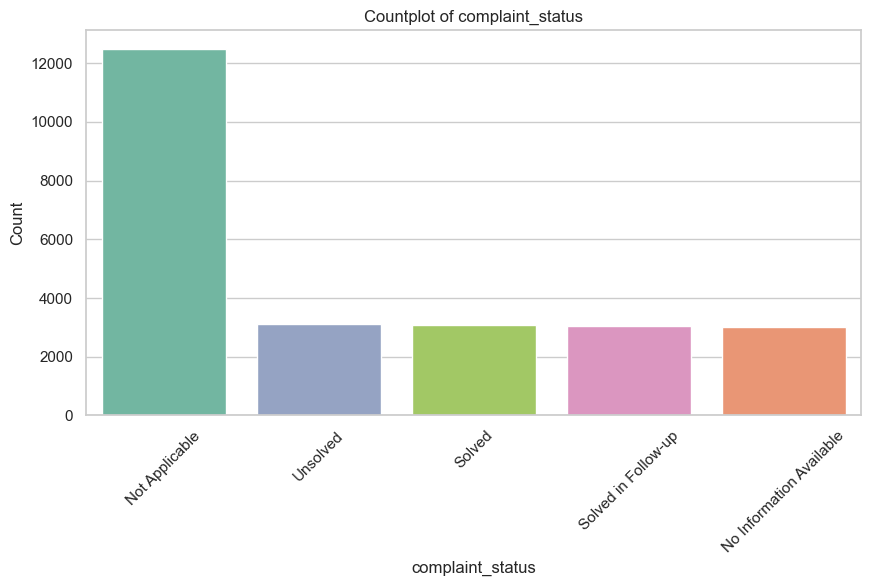

In [48]:
# Plotting a count plot for 'complaint_status' with different colors for each category
# The 'order' argument arranges the bars based on the value counts in descending order
# The 'palette' argument is used to apply a color palette to differentiate the bars
# The 'hue' argument adds different color hues based on the 'complaint_status' values, but we turn off the legend for clarity
plt.figure(figsize=(10, 5))
sns.countplot(x=df['complaint_status'], order=df['complaint_status'].value_counts().index, palette='Set2', hue=df['complaint_status'], legend=False)
plt.title('Countplot of complaint_status')
plt.xlabel('complaint_status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [49]:
# Check if the 'complained' column (0 = 'No', 1 = 'Yes') and the 'complaint_status' column 
# ('Not Applicable' should correspond to 'complained' being 0) are consistent across the entire dataset
# The condition (df['complained'] == 0) should match the condition (df['complaint_status'] == 'Not Applicable')
# If all rows meet this condition, 'is_consistent' will be True, meaning all rows where 'Not Applicable' are marked as not complained
is_consistent = ((df['complained'] == 0) == (df['complaint_status'] == 'Not Applicable')).all()
print("all of 'not applicable' didn't complained and vise versa: ", is_consistent)

# Check if all rows where the 'complaint_status' is 'No Information Available' have 'complained' as 1 (meaning they complained)
condition = df[df['complaint_status'] == 'No Information Available']['complained'] == 1
all_complained = condition.all()  # If all these rows complained (1), 'all_complained' will be True
print("all of 'no information available' complained: ", all_complained)


all of 'not applicable' didn't complained and vise versa:  True
all of 'no information available' complained:  True


####  2.18.2 Cleaning and Preprocessing 🧹

In [50]:
# Replace 'Not Applicable' with 'No Complain'
df['complaint_status'] = df['complaint_status'].replace('Not Applicable', 'No Complain')

# Replace 'No Information Available' with 'Unknown'
df['complaint_status'] = df['complaint_status'].replace('No Information Available', 'Unknown')


## 2.19 `feedback`

#### 2.19.1 Feature Visualization and Exploration 📊

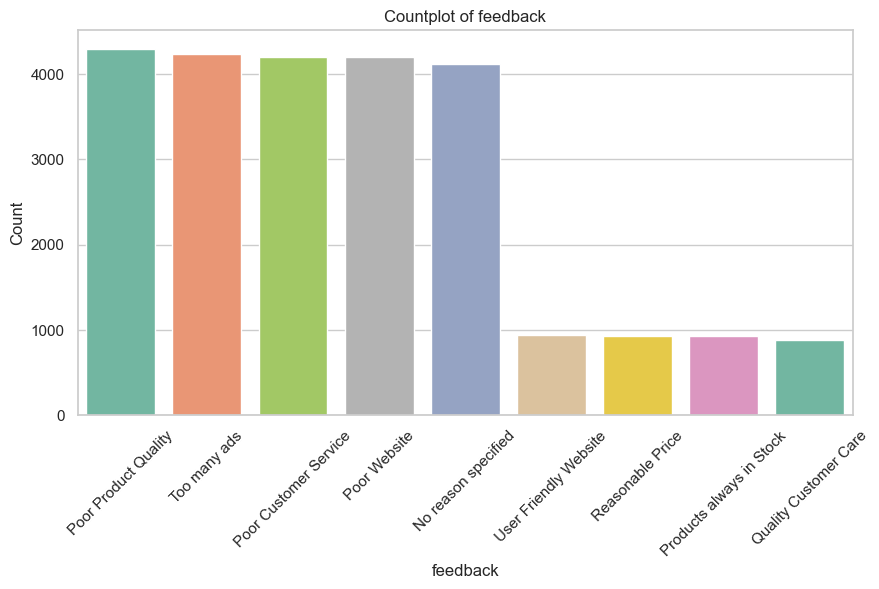

In [51]:
# Creating a countplot for the 'feedback' column
plt.figure(figsize=(10, 5))
sns.countplot(x=df['feedback'], order=df['feedback'].value_counts().index, palette='Set2', hue=df['feedback'], legend=False)
plt.title('Countplot of feedback')  # Setting the title of the plot
plt.xlabel('feedback')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()  # Display the plot


####  2.19.2 Cleaning and Preprocessing 🧹

In [52]:
# Define the feedback items
positive_feedback = [
    "Products always in Stock", "Reasonable Price", 
    "User Friendly Website", "Quality Customer Care"
]

negative_feedback = [
    "Poor Product Quality", "Too many ads",
    "Poor Customer Service", "Poor Website"
]

# Function to categorize feedback as Positive or Negative
def categorize_feedback(feedback):
    if feedback in positive_feedback:
        return 1  # Positive feedback is labeled as 1
    elif feedback in negative_feedback:
        return 0  # Negative feedback is labeled as 0
    else:
        return 'Unknown'  # If feedback doesn't match any category, mark as 'Unknown'

# Apply the function to the 'feedback' column and create a new column 'Is_feedback_positive'
df['Is_feedback_positive'] = df['feedback'].apply(categorize_feedback)


## 2.20 `churn`

#### 2.20.1 Feature Visualization and Exploration 📊

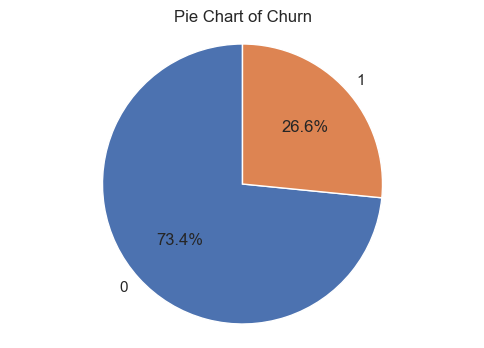

In [53]:
# Count the occurrences of each value in the 'churn' column
churn_counts = df['churn'].value_counts()

# Create a pie chart to visualize the distribution
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)  # Create pie chart
plt.title('Pie Chart of Churn')  # Title of the chart
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()  # Display the pie chart


## Part 3: Correlations and Feature Relationships

### 3.1  Correlation Heatmap of Numeric Features 📈

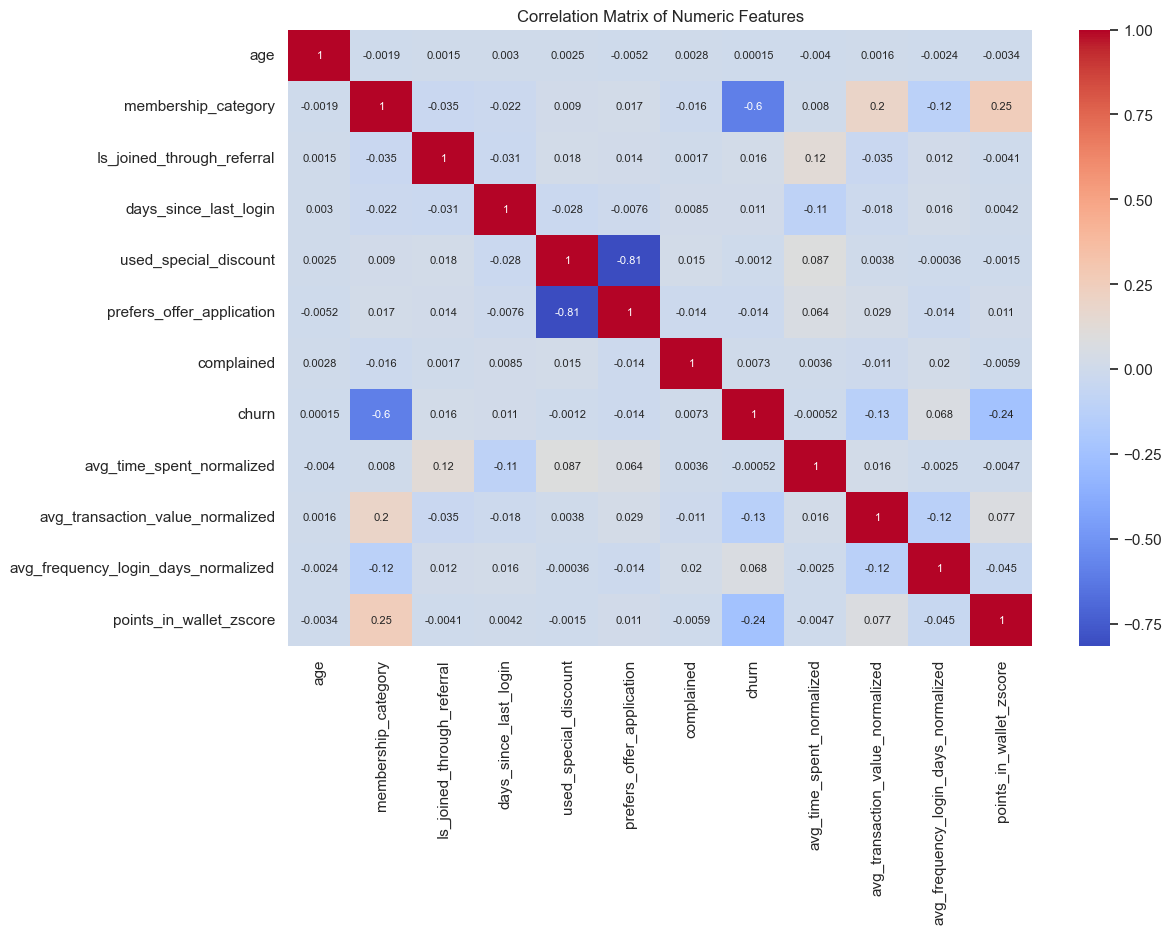

In [54]:
# List of numeric columns for correlation analysis
numeric_cols = [
    'age', 'membership_category', 'Is_joined_through_referral', 'days_since_last_login',
    'used_special_discount', 'prefers_offer_application', 'complained', 'churn',
    'avg_time_spent_normalized', 'avg_transaction_value_normalized', 
    'avg_frequency_login_days_normalized', 'points_in_wallet_zscore'
]

# Correlation heatmap
if len(numeric_cols) > 1:  # Check if there are more than one numeric columns
    plt.figure(figsize=(12, 8))  # Set the size of the plot
    corr = df[numeric_cols].corr()  # Calculate the correlation matrix for the specified columns
    sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})  # Create the heatmap
    plt.title('Correlation Matrix of Numeric Features')  # Set the title
    plt.show()  # Display the heatmap


### 3.2  Analyzing `days_since_last_login` Distribution by Churn Status 📊

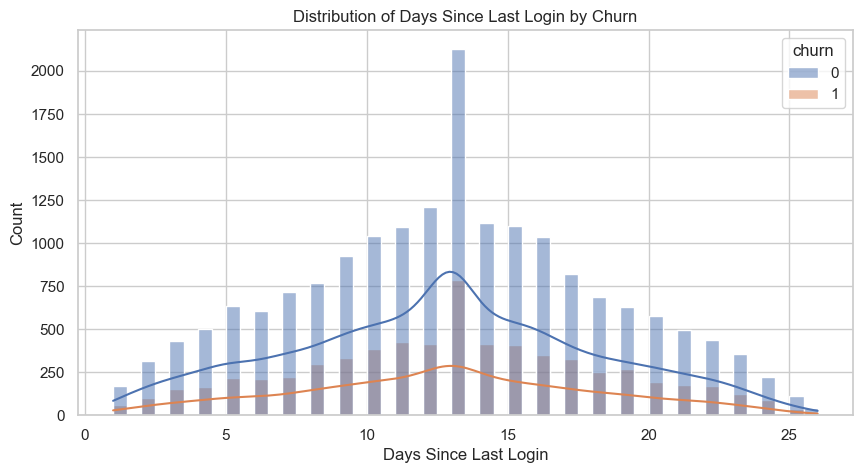

In [55]:
# Plotting the distribution of 'days_since_last_login' grouped by 'churn'
plt.figure(figsize=(10,5))  # Set the figure size
sns.histplot(data=df, x='days_since_last_login', hue='churn', kde=True, bins=50)  # Create histogram with KDE (Kernel Density Estimation)
plt.title('Distribution of Days Since Last Login by Churn')  # Set the plot title
plt.xlabel('Days Since Last Login')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.show()  # Display the plot


### 3.3 Analyzing `avg_time_spent` Distribution by Churn Status 📊


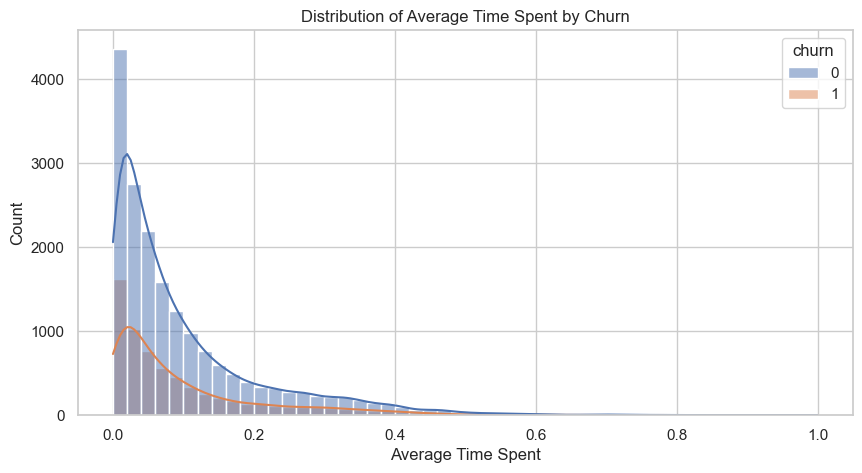

In [56]:
# Plotting the distribution of 'avg_time_spent_normalized' grouped by 'churn'
plt.figure(figsize=(10,5))  # Set the figure size
sns.histplot(data=df, x='avg_time_spent_normalized', hue='churn', kde=True, bins=50)  # Create histogram with KDE (Kernel Density Estimation)
plt.title('Distribution of Average Time Spent by Churn')  # Set the plot title
plt.xlabel('Average Time Spent')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.show()  # Display the plot


### 3.4  Churn Rate Analysis by Age Group 📊


age_group
<25      25.959653
25-35    27.600345
35-45    26.901503
45-60    26.323639
60+      26.432944
dtype: float64


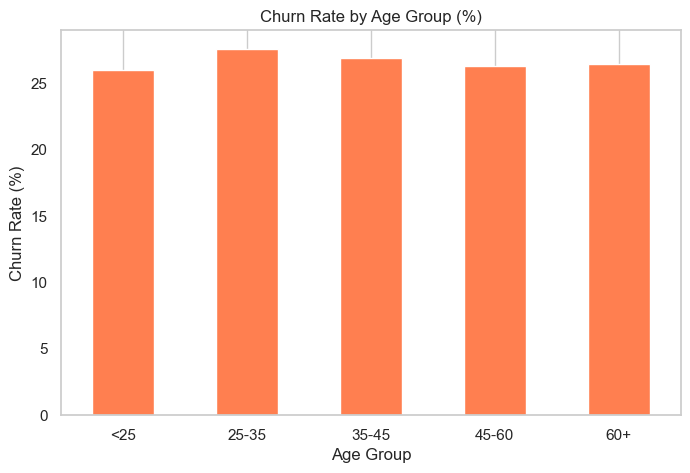

In [57]:
# Defining age bins and corresponding labels
bins = [0, 25, 35, 45, 60, 100]  # Define age ranges
labels = ['<25', '25-35', '35-45', '45-60', '60+']  # Define the labels for age groups

# Creating a new column 'age_group' that categorizes 'age' into predefined age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Grouping data by 'age_group' and 'churn', counting occurrences
age_churn_counts = df.groupby(['age_group', 'churn'], observed=False).size().unstack(fill_value=0)

# Calculating churn rates for each age group
age_churn_rates = (age_churn_counts[1] / (age_churn_counts[0] + age_churn_counts[1])) * 100

# Printing churn rates by age group
print(age_churn_rates)

# Plotting churn rates by age group as a bar chart
plt.figure(figsize=(8, 5))
age_churn_rates.plot(kind='bar', color='coral')  # Bar plot with 'coral' color
plt.title('Churn Rate by Age Group (%)')  # Title of the chart
plt.ylabel('Churn Rate (%)')  # Label for the Y-axis
plt.xlabel('Age Group')  # Label for the X-axis
plt.xticks(rotation=0)  # Set x-axis labels rotation to 0 for better readability
plt.grid(axis='y')  # Add grid lines to the Y-axis
plt.show()  # Display the plot

# Dropping the 'age_group' column after the analysis is completed
df.drop(['age_group'], axis=1, inplace=True)


### 3.5 Distribution of Join Year by Churn Status

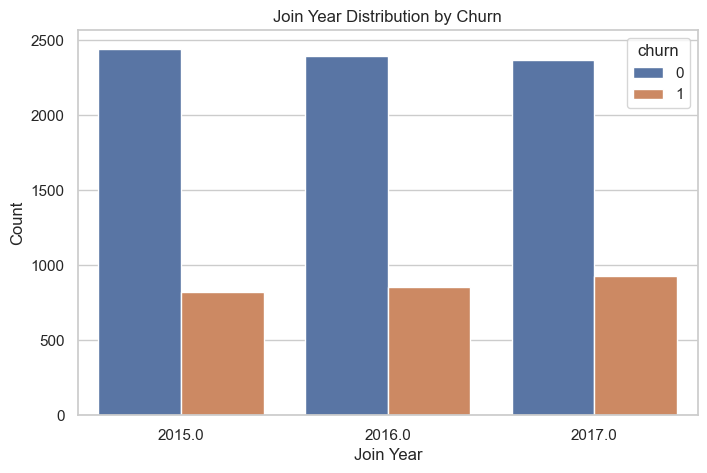

In [58]:
# Converting 'joining_date' to datetime format, coercing errors to NaT (Not a Time) where invalid
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')

# Extracting the year from the 'joining_date' and creating a new column 'join_year'
df['join_year'] = df['joining_date'].dt.year

# Plotting the distribution of 'join_year' by 'churn'
plt.figure(figsize=(8, 5))  # Set figure size for better clarity
sns.countplot(x='join_year', hue='churn', data=df, order=sorted(df['join_year'].dropna().unique()))  # Count plot with hue based on churn
plt.title('Join Year Distribution by Churn')  # Adding a title to the plot
plt.xlabel('Join Year')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()  # Display the plot


### 3.6  Countplot: Membership Category vs Churn

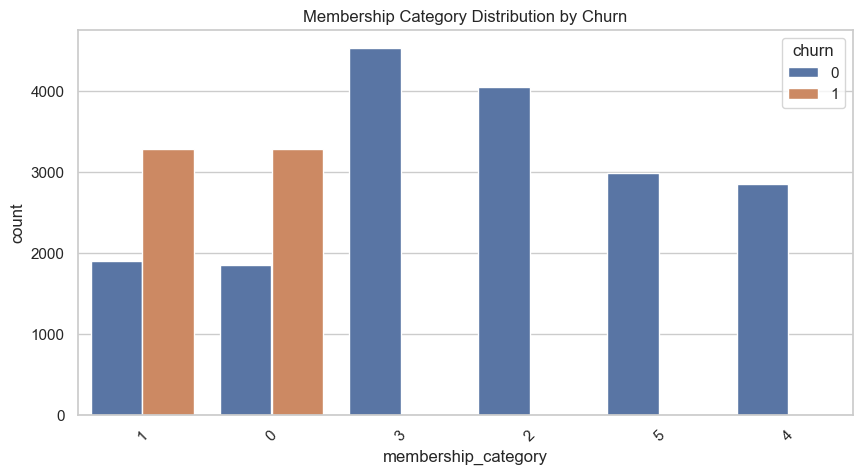

In [59]:
# Plotting the distribution of 'membership_category' by 'churn'
plt.figure(figsize=(10, 5))  # Set figure size for better clarity
sns.countplot(x='membership_category', hue='churn', data=df, order=df['membership_category'].value_counts().index)  # Count plot with hue based on churn
plt.title('Membership Category Distribution by Churn')  # Adding a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


### 3.7 Countplot: Joined Through Referral vs Churn

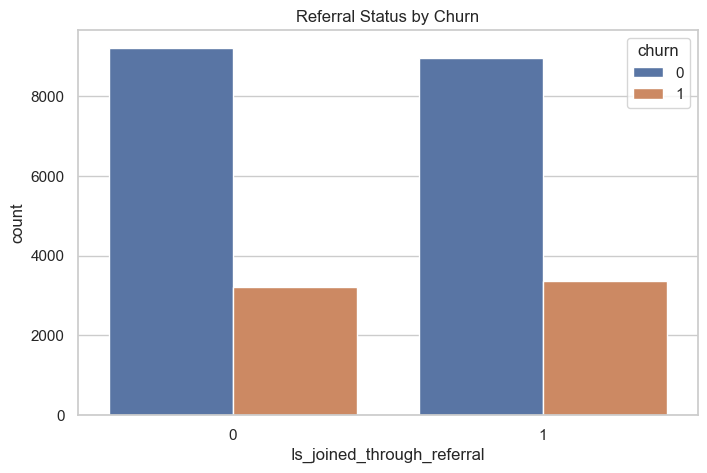

In [60]:
# Plotting the distribution of 'Is_joined_through_referral' by 'churn'
plt.figure(figsize=(8, 5))  # Set figure size for better clarity
sns.countplot(x='Is_joined_through_referral', hue='churn', data=df, order=df['Is_joined_through_referral'].value_counts().index)  # Count plot with hue based on churn
plt.title('Referral Status by Churn')  # Adding a title to the plot
plt.show()  # Display the plot


### 3.8 Countplot: Complaint Status vs Churn

complaint_status
No Complain            26.252601
Solved                 26.885566
Solved in Follow-up    27.587343
Unknown                26.666667
Unsolved               26.446015
dtype: float64


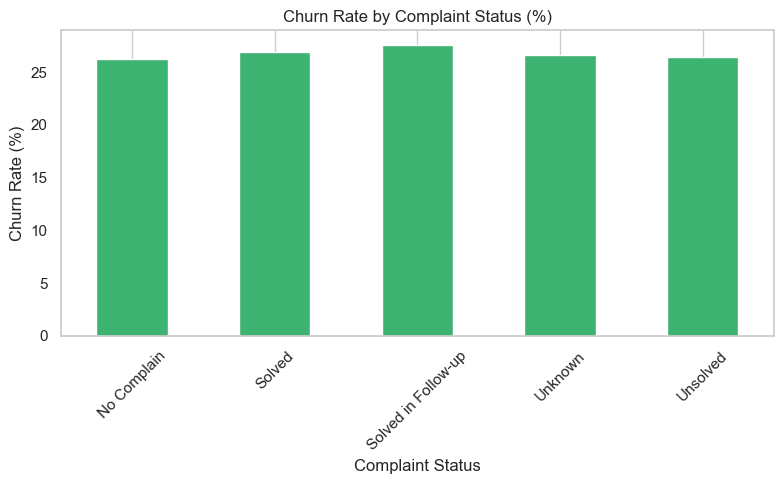

In [61]:
# Grouping the data by complaint status and churn, then calculating the churn rate
complaint_churn_counts = df.groupby(['complaint_status', 'churn'], observed=False).size().unstack(fill_value=0)  # Group by complaint status and churn
complaint_churn_rate = (complaint_churn_counts[1] / (complaint_churn_counts[0] + complaint_churn_counts[1])) * 100  # Calculate churn rate in percentage

# Print churn rate by complaint status
print(complaint_churn_rate)

# Plotting the churn rate by complaint status
plt.figure(figsize=(8, 5))  # Set figure size
complaint_churn_rate.plot(kind='bar', color='mediumseagreen')  # Bar plot for churn rate
plt.title('Churn Rate by Complaint Status (%)')  # Title for the plot
plt.ylabel('Churn Rate (%)')  # Y-axis label
plt.xlabel('Complaint Status')  # X-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


### 3.9 Countplot: Used Special Discount vs Churn


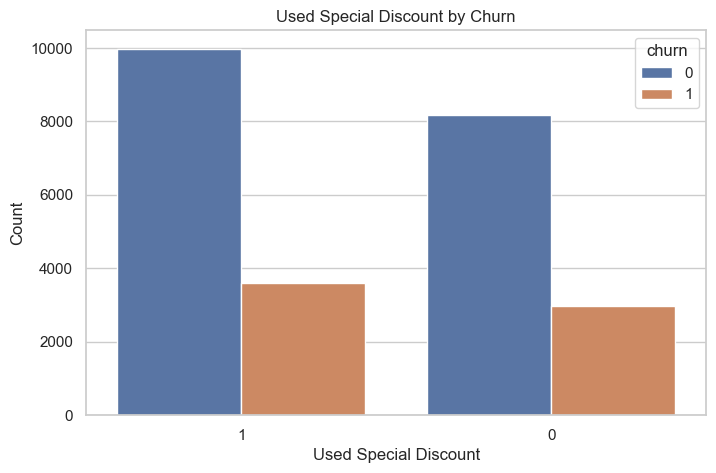

In [62]:
# Creating a count plot to visualize the number of customers who used the special discount by their churn status
plt.figure(figsize=(8, 5))  # Set the figure size
sns.countplot(x='used_special_discount', hue='churn', data=df, order=df['used_special_discount'].value_counts().index)  # Countplot by discount usage and churn
plt.title('Used Special Discount by Churn')  # Title of the plot
plt.xlabel('Used Special Discount')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the plot

### 3.10 Countplot: Past Complaint vs Churn

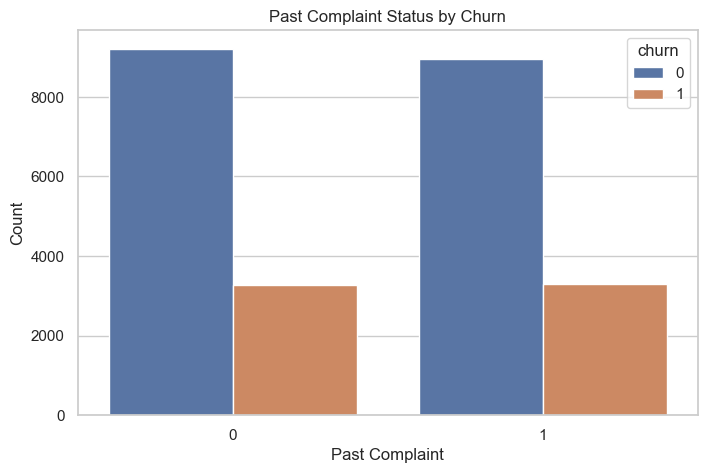

In [63]:
# Creating a count plot to visualize the number of customers who complained in the past by their churn status
plt.figure(figsize=(8, 5))  # Set the figure size
sns.countplot(x='complained', hue='churn', data=df, order=df['complained'].value_counts().index)  # Countplot by complaint status and churn
plt.title('Past Complaint Status by Churn')  # Title of the plot
plt.xlabel('Past Complaint')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the plot


## Part 4: Export Cleaned Data

In [65]:
# Saves the DataFrame 'df' to a CSV file
# The parameter index=False prevents adding an unnecessary index column to the file
# The file will be saved in the current path with the name 'Cleaned_Churn_Dataset.csv'
df.to_csv('Cleaned_Churn_Dataset.csv', index=False)